<a href="https://colab.research.google.com/github/mmartigani/RoadMapIA/blob/main/RNA_Con_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [9]:
from tensorflow import keras
keras.__version__

'3.8.0'

In [10]:
from tensorflow.keras import datasets

In [11]:
mnist = datasets.mnist

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
y_train.shape

(60000,)

In [16]:
y_train[0]

np.uint8(5)

In [17]:
import numpy as np
import matplotlib.pyplot as plt

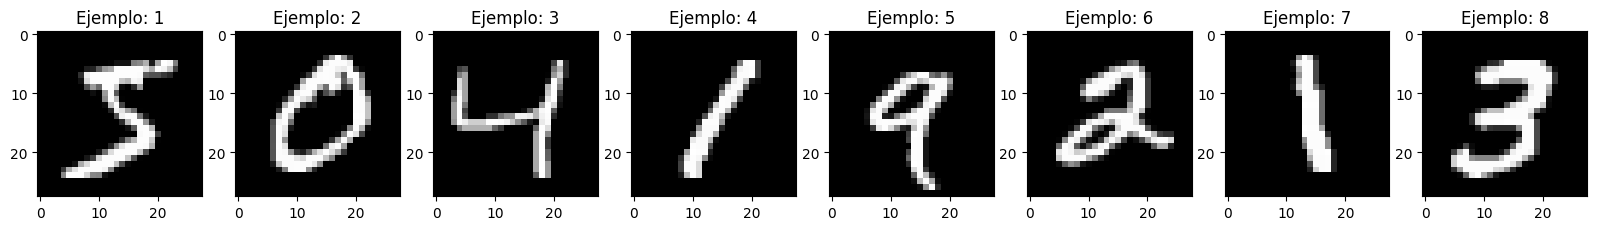

In [18]:
# Visualizacion de los primeros 8 ejemplos de nuestro conjunto de datos de entrenamiento
plt.figure(figsize=(20, 4))

for index, digit in zip(range(1, 9), X_train[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(np.reshape(digit, (28,28)), cmap=plt.cm.gray)
    plt.title('Ejemplo: ' + str(index))
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [20]:
X_test.shape

(5000, 28, 28)

In [21]:
X_val.shape

(5000, 28, 28)

In [22]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [23]:
network = models.Sequential()
network.add(layers.Dense(300, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
network.layers

[<Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [26]:
hidden1 = network.layers[1]

In [27]:
weights, biases = hidden1.get_weights()

In [28]:
weights

array([[-0.00721686, -0.11723723, -0.06983632, ..., -0.10451117,
         0.03837471, -0.06842133],
       [ 0.07818919, -0.07573368,  0.11312307, ...,  0.03193248,
         0.00616188,  0.11626653],
       [ 0.06178144,  0.03486135, -0.03934016, ...,  0.06401514,
         0.0791892 , -0.05102725],
       ...,
       [-0.02985331,  0.03517377,  0.08120147, ...,  0.07705303,
        -0.01017518,  0.07596076],
       [ 0.0273852 ,  0.12026345, -0.10792768, ...,  0.03386653,
        -0.05593942,  0.11496183],
       [ 0.07281413,  0.02619978, -0.07377948, ..., -0.10132794,
        -0.0002647 , -0.10314141]], dtype=float32)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [30]:
network.compile(loss='categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy', 'Precision'])

In [31]:
X_train_prep = X_train.reshape((60000, 28*28))
X_train_prep = X_train_prep.astype('float32') / 255

X_test_prep = X_test.reshape((5000, 28*28))
X_test_prep = X_test_prep.astype('float32') / 255

X_val_prep = X_val.reshape((5000, 28*28))
X_val_prep = X_val_prep.astype('float32') / 255

In [32]:
X_train.shape

(60000, 28, 28)

In [33]:
X_train_prep.shape

(60000, 784)

In [34]:
from tensorflow.keras.utils import to_categorical

y_train_prep = to_categorical(y_train)
y_test_prep = to_categorical(y_test)
y_val_prep = to_categorical(y_val)

In [35]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [36]:
y_train_prep

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [37]:
history = network.fit(X_train_prep,
                      y_train_prep,
                      epochs=10,
                      validation_data=(X_val_prep, y_val_prep))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - Precision: 0.9132 - accuracy: 0.7334 - loss: 0.9800 - val_Precision: 0.9419 - val_accuracy: 0.9154 - val_loss: 0.3022
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - Precision: 0.9412 - accuracy: 0.9148 - loss: 0.2946 - val_Precision: 0.9508 - val_accuracy: 0.9312 - val_loss: 0.2439
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - Precision: 0.9520 - accuracy: 0.9331 - loss: 0.2376 - val_Precision: 0.9552 - val_accuracy: 0.9386 - val_loss: 0.2062
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - Precision: 0.9582 - accuracy: 0.9428 - loss: 0.2010 - val_Precision: 0.9609 - val_accuracy: 0.9488 - val_loss: 0.1778
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - Precision: 0.9646 - accuracy: 0.9525 - loss: 0.1701 - val_Precision: 0.9630 - val_accuracy: 0.9514 - val_loss: 0.1614
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - Precision: 0.9668 - accuracy: 0.9572 - loss: 0.1495 - val_Precision: 0

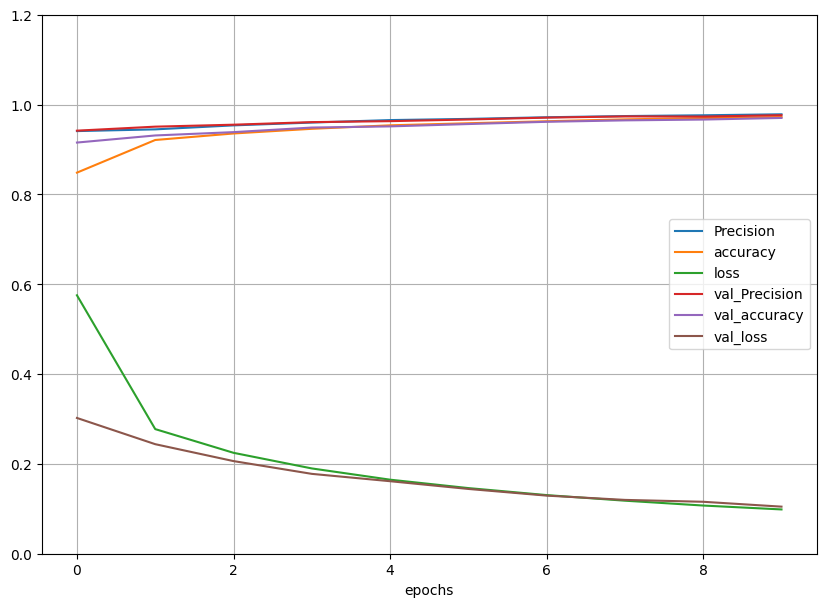

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.xlabel("epochs")
plt.show()

In [39]:
test_loss, test_acc, test_prec = network.evaluate(X_test_prep, y_test_prep)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 0.9737 - accuracy: 0.9680 - loss: 0.1088


In [40]:
print('test_acc:', test_acc)
print('test_prec:', test_prec)

test_acc: 0.9667999744415283
test_prec: 0.9738442897796631


In [41]:
# Suponemos que X_new es un nuevo ejemplo que el algoritmo no ha visto nunca
X_new = X_test[34]

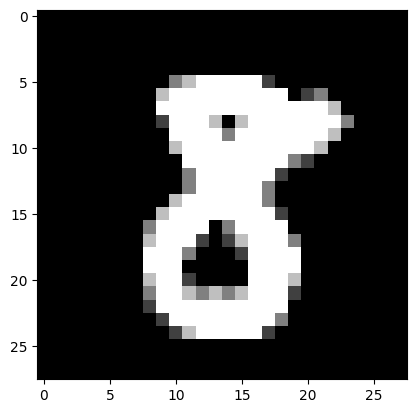

In [42]:
# Representación gráfica del nuevo ejemplo que queremos predecir
plt.imshow(np.reshape(X_new, (28,28)), cmap=plt.cm.gray)
plt.show()

In [43]:
# Preprocesamos la nueva imagen que queremos predecir
X_new_prep = X_new.reshape((1, 28*28))
X_new_prep = X_new_prep.astype('float32') / 255

In [44]:
# Relizamos la prediccion
y_proba = network.predict(X_new_prep)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


In [45]:
y_proba

array([[7.0190174e-07, 3.2379104e-09, 7.0315264e-07, 2.8762111e-04,
        2.3944239e-11, 1.1198071e-06, 1.1909441e-10, 2.8254796e-10,
        9.9970847e-01, 1.3351562e-06]], dtype=float32)

In [46]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [47]:
# Realizamos la prediccion obteniendo una clase en lugar de una probabilidad
np.argmax(network.predict(X_new_prep), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([8])